In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Step 1: Import the specified data source from yfinance
tickers = ["AAPL", "BND"]
data = yf.download(tickers, period="5y", start="2018-01-01")

[*********************100%***********************]  2 of 2 completed


In [14]:
# Step 2: Implement CPPI and drawdown constraints
def run_cppi_strategy(data, floor=0.8, m=3):
    df = data.copy()
    risky_asset = df["Adj Close"]["AAPL"]
    risk_free_asset = df["Adj Close"]["BND"]
    floor_value = df["Adj Close"]["AAPL"] * floor

    # CPPI Parameters
    account_value = np.ones(len(df))  # Initial investment value is set to 1
    cushion = account_value - floor_value
    cppi_value = account_value.copy()
    m_multiplier = m

    for i in range(1, len(df)):
        cushion[i] = max(account_value[i] - floor_value[i], 0)
        account_value[i] = cppi_value[i - 1] * (1 + risky_asset[i] / risky_asset[i - 1] - 1)  # Rebalance daily
        cppi_value[i] = max(account_value[i], cushion[i] * m_multiplier)

    return cppi_value

def apply_drawdown_constraint(data, max_drawdown=0.2):
    df = data.copy()
    risky_asset = df["Adj Close"]["AAPL"]

    peak_value = 0
    for i in range(len(df)):
        if risky_asset[i] > peak_value:
            peak_value = risky_asset[i]
        elif (peak_value - risky_asset[i]) / peak_value > max_drawdown:
            df["Adj Close"]["AAPL"][i:] = 0

    return df

In [15]:
# Step 3: Test the CPPI and drawdown constraints on the specified data source
cppi_portfolio = run_cppi_strategy(data)
data_with_drawdown_constraint = apply_drawdown_constraint(data)

<ipython-input-14-8d24f49ef5fe>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Adj Close"]["AAPL"][i:] = 0


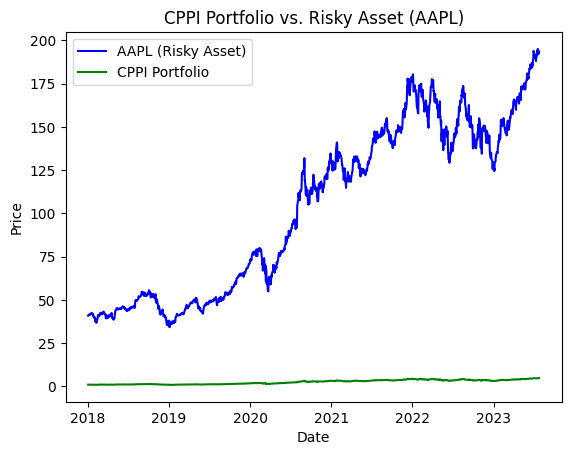

In [18]:
# Step 4: Analyze the results
# Plot the performance of CPPI portfolio and the risky asset
plt.plot(data.index, data["Adj Close"]["AAPL"], label="AAPL (Risky Asset)", color="blue")
plt.plot(data.index, cppi_portfolio, label="CPPI Portfolio", color="green")
plt.title("CPPI Portfolio vs. Risky Asset (AAPL)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

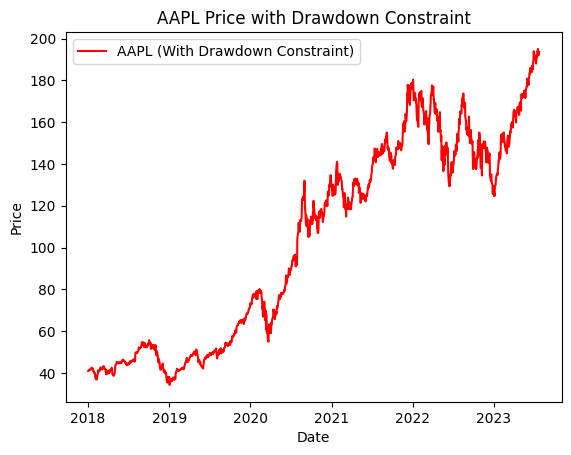

In [19]:
# Plot the performance with drawdown constraint
plt.plot(data_with_drawdown_constraint.index, data_with_drawdown_constraint["Adj Close"]["AAPL"], label="AAPL (With Drawdown Constraint)", color="red")
plt.title("AAPL Price with Drawdown Constraint")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()